<a href="https://colab.research.google.com/github/jcriostorres/Concentrador_solar/blob/main/Analisis_concentrador_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diseño y análisis de un concentrador solar utilizando un multímetro con termocupla una antena y Python




In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# datos experimentales
df = pd.read_csv('temp_CS_carepa2024-05-05.csv') # datos experimentales e historicos

# Análisis estadístico básico
print(df.describe())

            temp  cloudcover  visibility  solarradiation  solarenergy  \
count  24.000000   24.000000   24.000000       24.000000    24.000000   
mean   26.825000   65.929167   15.337500      233.041667     0.841667   
std     3.274307   28.592664    6.366134      303.136284     1.095809   
min    23.100000   26.800000    5.700000        0.000000     0.000000   
25%    24.500000   50.000000   10.000000        0.000000     0.000000   
50%    25.100000   59.250000   12.750000       37.500000     0.150000   
75%    30.250000   99.475000   24.100000      434.250000     1.550000   
max    32.100000  100.000000   24.100000      887.000000     3.200000   

         uvindex   temp_expe    temp_desvS  
count  24.000000   24.000000  2.400000e+01  
mean    2.333333   67.662500  4.495007e+01  
std     3.002414   44.950067  7.258250e-15  
min     0.000000   24.200000  4.495007e+01  
25%     0.000000   26.875000  4.495007e+01  
50%     0.500000   52.500000  4.495007e+01  
75%     4.250000  111.00000

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Ahora, puedes leer el archivo CSV
df = pd.read_csv(fn)

Saving temp_CS_carepa2024-05-05.csv to temp_CS_carepa2024-05-05.csv
User uploaded file "temp_CS_carepa2024-05-05.csv" with length 2082 bytes


In [8]:
df= pd.read_csv('temp_CS_carepa2024-05-05.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

df_especificas = df[df['datetime'].dt.date == pd.to_datetime('2024-05-05').date()][['datetime', 'temp', 'cloudcover', 'solarenergy', 'conditions']]

print(df_especificas)

print(df.describe())

              datetime  temp  cloudcover  solarenergy              conditions
0  2024-05-05 00:00:00  23.9        98.3          0.0                Overcast
1  2024-05-05 01:00:00  23.6        78.1          0.0        Partially cloudy
2  2024-05-05 02:00:00  23.4        99.8          0.0                Overcast
3  2024-05-05 03:00:00  23.3        84.5          0.0        Partially cloudy
4  2024-05-05 04:00:00  23.2        66.5          0.0        Partially cloudy
5  2024-05-05 05:00:00  23.1        99.8          0.0                Overcast
6  2024-05-05 06:00:00  25.0        50.0          0.0        Partially cloudy
7  2024-05-05 07:00:00  24.8        53.7          0.3        Partially cloudy
8  2024-05-05 08:00:00  26.0        50.0          0.9        Partially cloudy
9  2024-05-05 09:00:00  27.0        50.0          1.7  Rain, Partially cloudy
10 2024-05-05 10:00:00  27.9        64.8          2.3  Rain, Partially cloudy
11 2024-05-05 11:00:00  29.0        50.0          2.3  Rain, Par

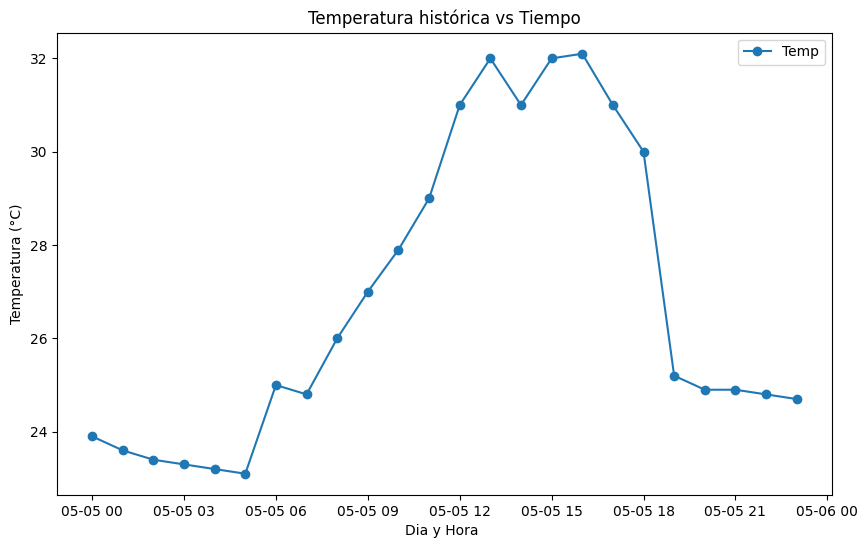

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Convertir la columna 'datetime' a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df_filtered = df[df['datetime'].dt.date == pd.to_datetime('2024-05-05').date()]

# Crear un gráfico de puntos con línea para 'temp' vs 'datetime'
plt.figure(figsize=(10,6))
plt.plot(df_filtered ['datetime'], df_filtered ['temp'], marker='o', linestyle='-', label='Temp')

df_filtered[['temp', 'temp_expe']] = scaler.fit_transform(df_filtered[['temp', 'temp_expe', ]])


# Configurar el título y las etiquetas
plt.title('Temperatura histórica vs Tiempo')
plt.xlabel('Dia y Hora ')
plt.ylabel('Temperatura (°C)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


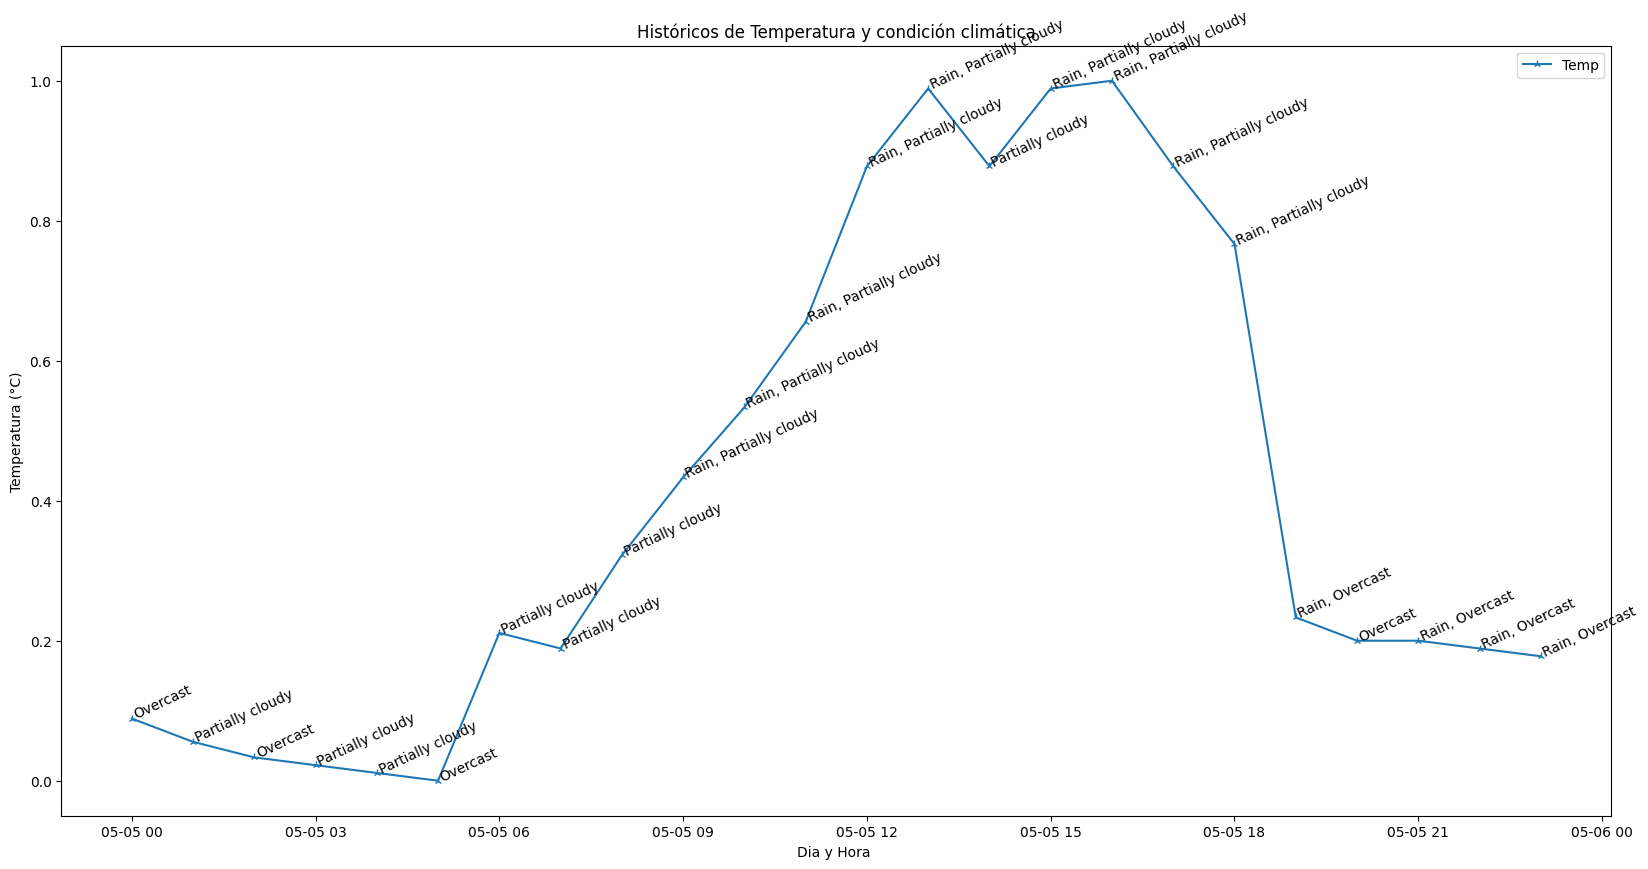

In [13]:

# Crear un gráfico de dispersión para 'temp' vs 'datetime'
plt.figure(figsize=(20,10))
plt.plot(df_filtered['datetime'], df_filtered['temp'], marker='2', linestyle='-', label='Temp')

# Añadir anotaciones de texto para 'conditions'
for i in range(len(df_filtered)):
    plt.text(df_filtered['datetime'].iloc[i], df_filtered['temp'].iloc[i], df_filtered['conditions'].iloc[i], rotation=25)

# Configurar el título y las etiquetas
plt.title('Históricos de Temperatura y condición climática')
plt.xlabel('Dia y Hora ')
plt.ylabel('Temperatura (°C)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

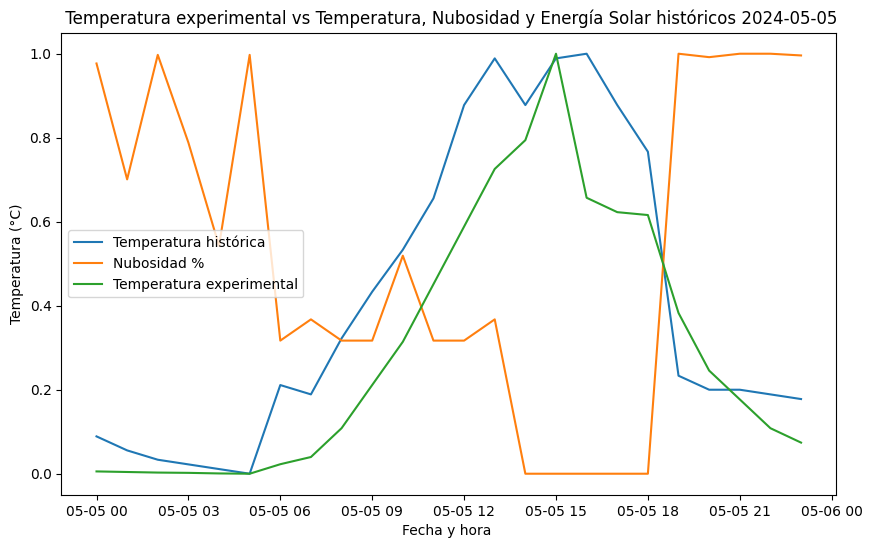

In [14]:
# Convertir la columna 'datetime' a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Filtrar el DataFrame para la fecha especificada
#df_filtered = df[df['datetime'].dt.date == pd.to_datetime('2024-05-05').date()]
# Convertir la columna 'datetime' a formato datetime
df_filtered[['temp', 'cloudcover',  'temp_expe' ]] = scaler.fit_transform(df_filtered[['temp', 'cloudcover', 'temp_expe']])

# Crear un gráfico de línea para 'temp'
plt.figure(figsize=(10,6))
plt.plot(df_filtered['datetime'], df_filtered['temp'], label='Temperatura histórica')

# Crear un gráfico de línea para 'cloudcover'
plt.plot(df_filtered['datetime'], df_filtered['cloudcover'], label='Nubosidad %')

# Crear un gráfico de línea para 'solarenergy'
#plt.plot(df_filtered['datetime'], df_filtered['solarenergy'], label='Solar Energy MJ/m2')

# Crear un gráfico de línea para 'temp_expe'

plt.plot(df_filtered['datetime'], df_filtered['temp_expe'], label='Temperatura experimental')

# Configurar el título y las etiquetas
plt.title(' Temperatura experimental vs Temperatura, Nubosidad y Energía Solar históricos 2024-05-05')
plt.xlabel('Fecha y hora ')
plt.ylabel('Temperatura (°C)')
plt.legend()

# Mostrar el gráfico
plt.show()